**Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestría en Matemáticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matemático II - Parte I**

> Trimestre 25-P

**Profesor**: 
    
> Dr. Alejandro Román Vásquez

**Alumnos**: 
    
> Alan Badillo Salas
> 
> Brandon Eduardo Antonio Gómez
> 
> Diego Armando Arce Montes de Oca

# Fase 1 - Adquisición de los datos

## Cargamos las librerías

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

## Cargamos los conjuntos de datos

In [2]:
casas = pandas.read_csv("Casas.csv")
casas_kaggle = pandas.read_csv("Casas_Kaggle.csv")

## Construimos y seleccionamos las columnas de análisis

In [3]:
columnas_analisis = [
    "MSZoning",
    "LotArea",
    "Street",
    "Neighborhood",
    "YearBuilt",
    "OverallCond",
    "ExterQual",
    "GrLivArea",
    "FullBath",
    "GarageArea",
    "BsmtCond",
    "FireplaceQu",
    "Electrical",
    "LotFrontage",
    "KitchenQual",
    "PavedDrive",
    "SalePrice",
]

casas_analisis = casas[columnas_analisis]

casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


## Creamos los ejes de datos de análisis

In [4]:
MSZoning = casas_analisis["MSZoning"]
LotArea = casas_analisis["LotArea"]
Street = casas_analisis["Street"]
Neighborhood = casas_analisis["Neighborhood"]
YearBuilt = casas_analisis["YearBuilt"]
OverallCond = casas_analisis["OverallCond"]
ExterQual = casas_analisis["ExterQual"]
GrLivArea = casas_analisis["GrLivArea"]
FullBath = casas_analisis["FullBath"]
GarageArea = casas_analisis["GarageArea"]
BsmtCond = casas_analisis["BsmtCond"]
FireplaceQu = casas_analisis["FireplaceQu"]
Electrical = casas_analisis["Electrical"]
LotFrontage = casas_analisis["LotFrontage"]
KitchenQual = casas_analisis["KitchenQual"]
PavedDrive = casas_analisis["PavedDrive"]
SalePrice = casas_analisis["SalePrice"]

# Fase 2 - Exploración de los datos

## Exploración

Exploramos todos los ejes de datos contra la respuesta para entender el comportamiento de los ejes de datos categóricos y numéricos.

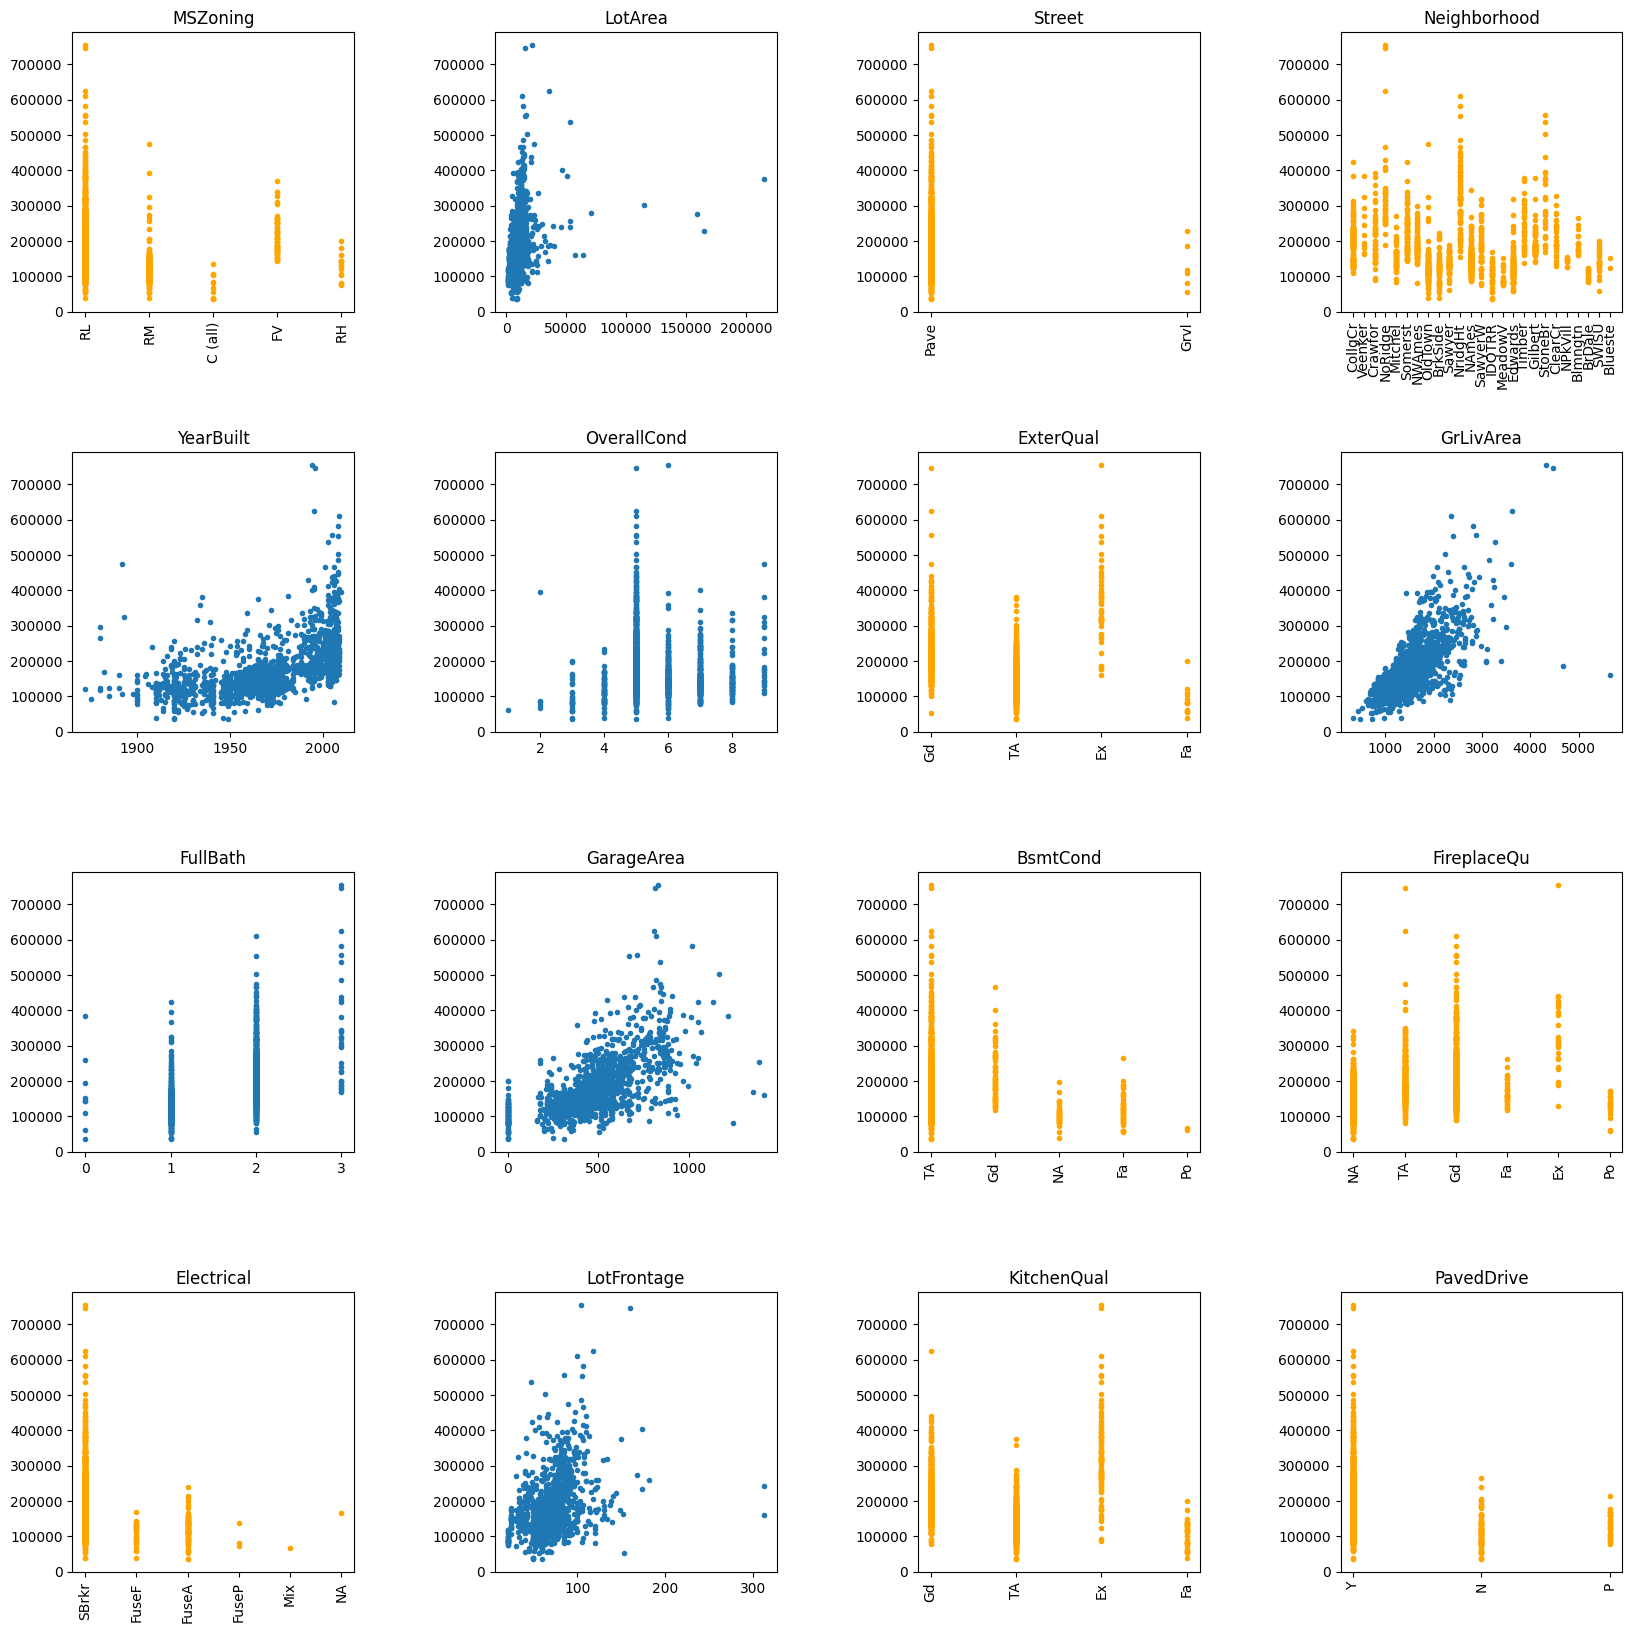

In [5]:
Ejes = [
    [MSZoning, LotArea, Street, Neighborhood],
    [YearBuilt,OverallCond,ExterQual,GrLivArea],
    [FullBath, GarageArea, BsmtCond, FireplaceQu],
    [Electrical, LotFrontage, KitchenQual, PavedDrive]
]

figure, axis = pyplot.subplots(4, 4, figsize=(20, 20))

for i, grupo in enumerate(Ejes):
    for j, x in enumerate(grupo):
        if x.dtype == "object":
            axis[i][j].scatter(x.fillna("NA"), SalePrice, color="orange", marker=".")
            axis[i][j].tick_params(axis="x", rotation=90)
        else:
            axis[i][j].scatter(x, SalePrice, marker=".")

        axis[i][j].set_title(x.name)

pyplot.subplots_adjust(wspace=0.5, hspace=0.5)

# Fase 3 - Transformación de variables

## Codificación por la Media para ejes de altas categorías

Determinamos sustituir cada categoría por la respuesta media en los ejes con 5 o más categorías, incluyendo a `NaN` como la categoría `NA`.

**Nota:** Para 5 o más categorías se formarían 4 o más *dummies* lo que provocaría una fuerte partición del espacio con colinealidad. Esto podría generar efectos torpes en el aprendizaje, por lo que se decidió cambiar las categorías por su media.

In [6]:
Ejes_Cats = [
    ("MSZoning", MSZoning),
    ("Neighborhood", Neighborhood),
    ("OverallCond", OverallCond),
    ("BsmtCond", BsmtCond),
    ("FireplaceQu", FireplaceQu),
    ("Electrical", Electrical),
]

grupos = []
for nombre, eje in Ejes_Cats:
    eje = eje.fillna("NA")
    casas_analisis.loc[:, [nombre]] = eje
    eje_mean = pandas.DataFrame([eje, SalePrice]).T.groupby(nombre).mean().merge(eje, on=nombre)["SalePrice"]
    casas_analisis.loc[:, [f"{nombre}_mean"]] = eje_mean
    grupos.append((nombre, f"{nombre}_mean"))

for nombre, nombre_mean in grupos:
    print(casas_analisis[[nombre, nombre_mean]].groupby(nombre).mean(), end="\n\n")
    print(casas_analisis[[nombre, nombre_mean]].sample(5), end="\n\n")
    print("=" * 40)


          MSZoning_mean
MSZoning               
C (all)   180892.423032
FV        181841.579912
RH        182918.974223
RL        181042.975053
RM         179858.49175

     MSZoning  MSZoning_mean
1315       RL  126316.830275
1232       RL  191004.994787
1396       RL  126316.830275
1263       RL  126316.830275
389        RL  191004.994787

             Neighborhood_mean
Neighborhood                  
Blmngtn          214658.763204
Blueste          236270.372913
BrDale           176109.190294
BrkSide          186559.368902
ClearCr          172481.558969
CollgCr          188980.910889
Crawfor          183657.859708
Edwards          181422.559941
Gilbert          177664.307533
IDOTRR           171366.389208
MeadowV          175567.328775
Mitchel          184463.309097
NAmes            175717.556546
NPkVill          187092.862128
NWAmes           194610.288826
NoRidge          174011.503159
NridgHt          166247.150624
OldTown          185482.748973
SWISU             172085.50164
Sawye

## Codificación por *Dummies* para ejes de pocas categorías

Para los ejes de 4 o menos categorías usamos la codificación *One-Hot* para las $k$ categorías para después seleccionar $k-1$ *dummies*.

**Nota:** Cuando los ejes de datos tienen 4 o menos categorías se pueden tratar como $1$, $2$ y hasta $3$ variables tomando en cuenta que la categoría que se debe excluír de la codificación es la de mayor cardinalidad, a esta se le conoce como la *base cero*.

In [7]:
Ejes_Dums = [
    ("ExterQual", ExterQual),
    ("FullBath", FullBath),
    ("KitchenQual", KitchenQual),
    ("PavedDrive", PavedDrive),
]

grupos = []
for nombre, eje in Ejes_Dums:
    columnas = []
    eje = eje.fillna("NA")
    casas_analisis.loc[:, [nombre]] = eje
    for i, cat in enumerate(eje.unique()):
        eje_dummy = (eje == cat).astype(int)
        casas_analisis.loc[:, [f"{nombre}_{cat}_dummy{i}"]] = eje_dummy
        columnas.append(f"{nombre}_{cat}_dummy{i}")
    grupos.append((nombre, columnas))

for nombre, columnas in grupos:
    for columna in columnas:
        print(casas_analisis[[nombre, columna]].groupby(nombre).sum(), end="\n\n")
    columnas.insert(0, nombre)
    print(casas_analisis[columnas].sample(5), end="\n\n")
    print("=" * 40)

           ExterQual_Gd_dummy0
ExterQual                     
Ex                           0
Fa                           0
Gd                         488
TA                           0

           ExterQual_TA_dummy1
ExterQual                     
Ex                           0
Fa                           0
Gd                           0
TA                         906

           ExterQual_Ex_dummy2
ExterQual                     
Ex                          52
Fa                           0
Gd                           0
TA                           0

           ExterQual_Fa_dummy3
ExterQual                     
Ex                           0
Fa                          14
Gd                           0
TA                           0

     ExterQual  ExterQual_Gd_dummy0  ExterQual_TA_dummy1  ExterQual_Ex_dummy2  \
725         TA                    0                    1                    0   
696         TA                    0                    1                    0   
1023     

## Resultados de las transformaciones

Mostramos las columnas resultantes tras las transformaciones, ahora tenemos las columnas originales en el conjunto de datos de análisis, más las columnas con las transformaciones *Mean Encoder* y las columnas con transformaciones *One-Hot* (para seleccionar las *Dummies*).

In [8]:
casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSZoning               1460 non-null   object 
 1   LotArea                1460 non-null   int64  
 2   Street                 1460 non-null   object 
 3   Neighborhood           1460 non-null   object 
 4   YearBuilt              1460 non-null   int64  
 5   OverallCond            1460 non-null   int64  
 6   ExterQual              1460 non-null   object 
 7   GrLivArea              1460 non-null   int64  
 8   FullBath               1460 non-null   int64  
 9   GarageArea             1460 non-null   int64  
 10  BsmtCond               1460 non-null   object 
 11  FireplaceQu            1460 non-null   object 
 12  Electrical             1460 non-null   object 
 13  LotFrontage            1201 non-null   float64
 14  KitchenQual            1460 non-null   object 
 15  Pave

# Fase 4 - Selección de variables y eliminación de valores atípicos

## Selección de variables

Podemos seleccionar (construir) las $22$ variables que serán utilizadas en el análisis tras las transformaciones.

In [9]:
x1 = casas_analisis["MSZoning_mean"]            # mean encoder
x2 = casas_analisis["LotArea"]                  # continua
x3 = casas_analisis["Neighborhood_mean"]        # mean encoder
x4 = casas_analisis["YearBuilt"]                # continua
x5 = casas_analisis["OverallCond_mean"]         # mean encoder
x6 = casas_analisis["ExterQual_Gd_dummy0"]      # dummy
x7 = casas_analisis["ExterQual_Ex_dummy2"]      # dummy
x8 = casas_analisis["ExterQual_Fa_dummy3"]      # dummy
x9 = casas_analisis["GrLivArea"]                # continua
x10 = casas_analisis["FullBath_1_dummy1"]       # dummy
x11 = casas_analisis["FullBath_3_dummy2"]       # dummy
x12 = casas_analisis["FullBath_0_dummy3"]       # dummy
x13 = casas_analisis["GarageArea"]              # continua
x14 = casas_analisis["BsmtCond_mean"]           # mean encoder
x15 = casas_analisis["FireplaceQu_mean"]        # mean encoder
x16 = casas_analisis["Electrical_mean"]         # mean encoder
x17 = casas_analisis["LotFrontage"]             # continua
x18 = casas_analisis["KitchenQual_Gd_dummy0"]   # dummy
x19 = casas_analisis["KitchenQual_Ex_dummy2"]   # dummy
x20 = casas_analisis["KitchenQual_Fa_dummy3"]   # dummy
x21 = casas_analisis["PavedDrive_N_dummy1"]     # dummy
x22 = casas_analisis["PavedDrive_P_dummy2"]     # dummy

Construimos una matriz que guarde las $22$ variables.

In [10]:
X = pandas.DataFrame([
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10,
    x11, x12, x13, x14, x15, x16, x17, x18, x19, x20,
    x21, x22
], index=[
    "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10",
    "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20",
    "x21", "x22"
]).T

X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,74528.000000,8450.0,194870.882353,2003.0,61000.000000,1.0,0.0,0.0,1710.0,0.0,...,548.0,121809.533333,337712.500000,122196.893617,65.0,1.0,0.0,0.0,0.0,0.0
1,74528.000000,9600.0,194870.882353,1976.0,141986.400000,0.0,0.0,0.0,1262.0,0.0,...,460.0,121809.533333,337712.500000,122196.893617,80.0,0.0,0.0,0.0,0.0,0.0
2,74528.000000,11250.0,194870.882353,2001.0,141986.400000,1.0,0.0,0.0,1786.0,0.0,...,608.0,121809.533333,337712.500000,122196.893617,68.0,1.0,0.0,0.0,0.0,0.0
3,74528.000000,9550.0,194870.882353,1915.0,141986.400000,0.0,0.0,0.0,1717.0,1.0,...,642.0,121809.533333,337712.500000,122196.893617,60.0,1.0,0.0,0.0,0.0,0.0
4,74528.000000,14260.0,194870.882353,2000.0,141986.400000,1.0,0.0,0.0,2198.0,0.0,...,836.0,121809.533333,337712.500000,122196.893617,84.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,126316.830275,7917.0,238772.727273,1999.0,216004.545455,0.0,0.0,0.0,1647.0,0.0,...,460.0,183632.620900,205723.488818,186825.113193,62.0,0.0,0.0,0.0,0.0,0.0
1456,126316.830275,13175.0,238772.727273,1978.0,216004.545455,0.0,0.0,0.0,2073.0,0.0,...,500.0,183632.620900,205723.488818,186825.113193,85.0,0.0,0.0,0.0,0.0,0.0
1457,126316.830275,9042.0,238772.727273,1941.0,216004.545455,0.0,1.0,0.0,2340.0,0.0,...,252.0,183632.620900,205723.488818,186825.113193,66.0,1.0,0.0,0.0,0.0,0.0
1458,126316.830275,9717.0,238772.727273,1950.0,216004.545455,0.0,0.0,0.0,1078.0,1.0,...,240.0,183632.620900,205723.488818,186825.113193,68.0,1.0,0.0,0.0,0.0,0.0


## Eliminación de valores atípicos

Consideramos eliminar los valores o puntos atípicos solo en las variables que son continuas (no las que vienen de las transformaciones).

A cada variable continua se le ajustan los valores que estén por encima del cuartil 3 más 1.5 veces el rango intercuartílico y los que están por debajo del cuartil 1 menos 1.5 el rango intercuartílico.

Es decir, la variable $x_j$ será sustituida por $x_j^*$

$$
x_j^* = \begin{cases}
Q_1 - 1.5 \cdot IQR & x_j < Q_1 - 1.5 \cdot IQR \\
x_j & Q_1 - 1.5 \cdot IQR \le x_j \le Q_3 + 1.5 \cdot IQR \\
Q_3 + 1.5 \cdot IQR & x_j > Q_3 + 1.5 \cdot IQR \\
\end{cases}
$$

También exploramos las variables originales contra las ajustadas.

,x2,x2_in,x4,x4_in,x9,x9_in,x13,x13_in,x17,x17_in
0,8450.0,8450.0,2003.0,2003.0,1710.0,1710.0,548.0,548.0,65.0,65.0
1,9600.0,9600.0,1976.0,1976.0,1262.0,1262.0,460.0,460.0,80.0,80.0
2,11250.0,11250.0,2001.0,2001.0,1786.0,1786.0,608.0,608.0,68.0,68.0
3,9550.0,9550.0,1915.0,1915.0,1717.0,1717.0,642.0,642.0,60.0,60.0
4,14260.0,14260.0,2000.0,2000.0,2198.0,2198.0,836.0,836.0,84.0,84.0
...,...,...,...,...,...,...,...,...,...,...
1455,7917.0,7917.0,1999.0,1999.0,1647.0,1647.0,460.0,460.0,62.0,62.0
1456,13175.0,13175.0,1978.0,1978.0,2073.0,2073.0,500.0,500.0,85.0,85.0
1457,9042.0,9042.0,1941.0,1941.0,2340.0,2340.0,252.0,252.0,66.0,66.0
1458,9717.0,9717.0,1950.0,1950.0,1078.0,1078.0,240.0,240.0,68.0,68.0


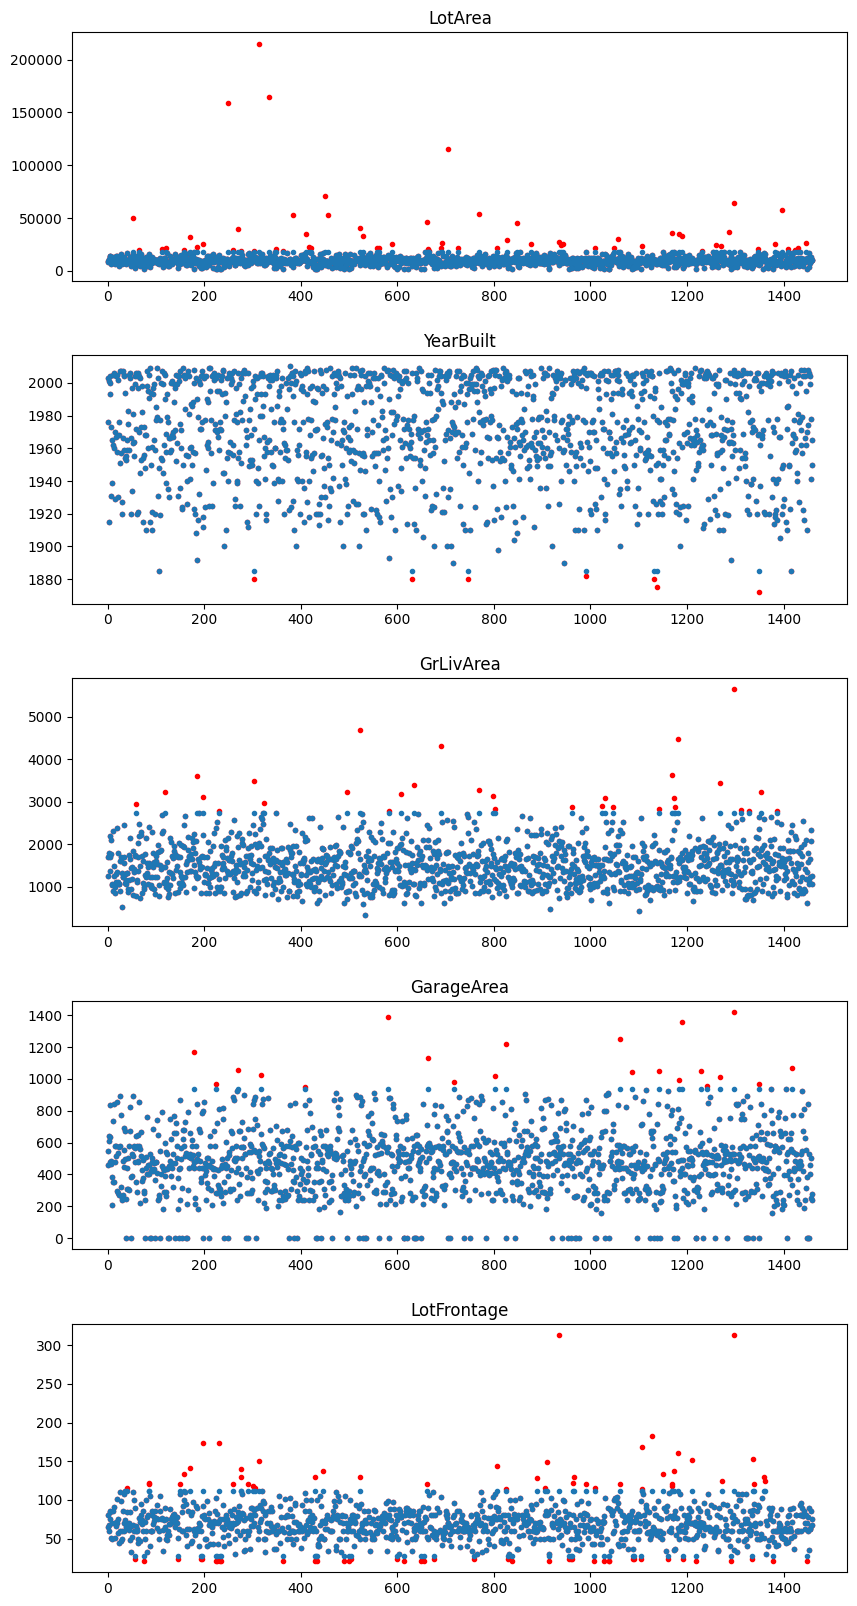

In [11]:
xs = [
    ("x2", x2), 
    ("x4", x4), 
    ("x9", x9), 
    ("x13", x13), 
    ("x17", x17)
]

fig, axis = pyplot.subplots(len(xs), 1, figsize=(10, 20))

columnas = []
for i, (nombre, x) in enumerate(xs):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    xmin = Q1 - 1.5 * IQR
    xmax = Q3 + 1.5 * IQR
    xp = x.copy().astype(float)
    xp[xp >= xmax] = xmax
    xp[xp <= xmin] = xmin
    axis[i].plot(x.index, x, marker=".", linestyle="", color="red")
    axis[i].plot(xp.index, xp, marker=".", linestyle="")
    axis[i].set_title(x.name)
    
    X.loc[:, [f"{nombre}_in"]] = xp 

    columnas.append(nombre)
    columnas.append(f"{nombre}_in")

pyplot.subplots_adjust(wspace=1, hspace=0.3)

X[columnas]

# Fase 5 - Imputación de datos

Las variables categóricas pueden sufrir una imputación lógica considerando la categoría faltante como la categoría `NA`, lo cuál se hizo en las transformaciones.

Pero, las variables continuas no pueden asumir una imputación de este tipo, ya que no se puede decidir sustituir los valores faltantes por un valor constante (por ejemplo, la media o un valor como cero).

Debemos aplicar una técnica como *Miss Forest* para reemplazar los datos faltantes, usando una predicción por bosques aleatorios o algún otro algoritmo, que permita reconstruir los datos faltantes (nulos) por las predicciones sobre las otras características (variables predictivas) sin considerar la respuesta (porque esta no estará disponible en datos de predicción).

En este caso la única variable continua con valores perdidos o nulos es $x_{17}$ o *LotFrontage* que tiene $1201 / 1460$ datos no nulos ($85.4\%$).

Construimos la matriz $X_1$ que contiene las mismas variables que la matriz $X$, excluyendo las variables que no fueron transformadas (en *Mean Encoder* y *Dummies*) y quitamos también la variable que será imputada.

Entonces intentaremos predecir los valores de $x_{17}$ a través de todas las demás variables.

In [12]:
X1 = X.copy().dropna(subset=["x17"])

y17 = X1["x17"]

del X1["x2"]
del X1["x4"]
del X1["x9"]
del X1["x13"]
del X1["x17"]
del X1["x17_in"]

X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1201 non-null   float64
 1   x3      1201 non-null   float64
 2   x5      1201 non-null   float64
 3   x6      1201 non-null   float64
 4   x7      1201 non-null   float64
 5   x8      1201 non-null   float64
 6   x10     1201 non-null   float64
 7   x11     1201 non-null   float64
 8   x12     1201 non-null   float64
 9   x14     1201 non-null   float64
 10  x15     1201 non-null   float64
 11  x16     1201 non-null   float64
 12  x18     1201 non-null   float64
 13  x19     1201 non-null   float64
 14  x20     1201 non-null   float64
 15  x21     1201 non-null   float64
 16  x22     1201 non-null   float64
 17  x2_in   1201 non-null   float64
 18  x4_in   1201 non-null   float64
 19  x9_in   1201 non-null   float64
 20  x13_in  1201 non-null   float64
dtypes: float64(21)
memory usage: 206.4 KB


La variable de respuesta será $x_{17}$

In [13]:
y17.info()

<class 'pandas.core.series.Series'>
Index: 1201 entries, 0 to 1459
Series name: x17
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


Utilizamos los bósques aleatorios para hacer la predicción de la respuesta continua (un problema de regresión) a partir de las otras variables predictoras sin usar la respuesta *SalePrice*.

In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X1, y17)

print(reg.score(X1, y17))

# Obtenemos los registros con datos faltantes
Xmiss = X[X1.columns][X["x17"].isna()]

# Predecimos los datos faltantes
yp = reg.predict(Xmiss)

# Reintegramos los datos faltantes (imputados) a la matriz original de variables
X.loc[:, ["x17_imp"]] = X["x17"]
X.loc[X["x17"].isna(), ["x17_imp"]] = yp

# Inspeccionamos la imputación
X[["x17", "x17_imp"]].sample(20)

0.9195778679931552


,x17,x17_imp
851,NaN,38.72
1145,52.0,52.00
565,66.0,66.00
889,128.0,128.00
744,41.0,41.00
1424,NaN,76.07
479,50.0,50.00
1171,76.0,76.00
147,NaN,75.87
302,118.0,118.00


Observamos como se altera la distribución tras la imputación, lo cuál no es mucho, comparado a una imputación a un valor constante como la media.

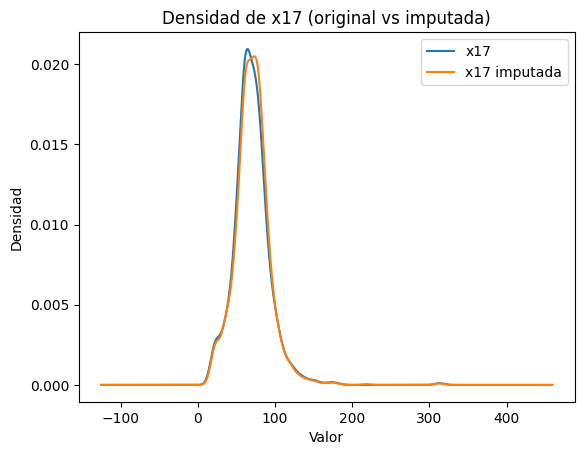

In [15]:
axis = X["x17"].plot.density(label="x17")
X["x17_imp"].plot.density(label="x17 imputada")

axis.set_title("Densidad de x17 (original vs imputada)")
axis.set_xlabel("Valor")
axis.set_ylabel("Densidad")
axis.legend()

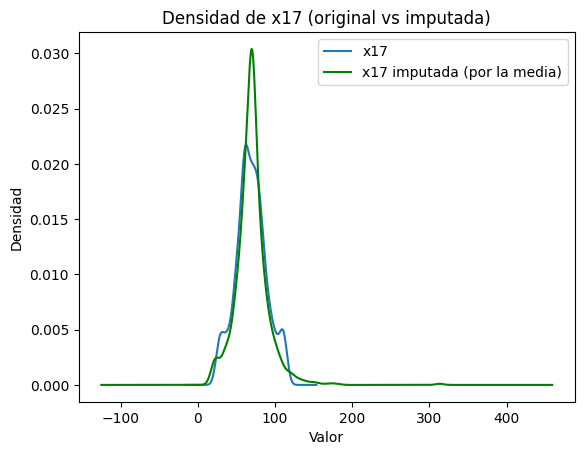

In [16]:
axis = X["x17_in"].plot.density(label="x17")
X["x17"].fillna(X["x17"].mean()).plot.density(label="x17 imputada (por la media)", color="green")
axis.set_title("Densidad de x17 (original vs imputada)")
axis.set_xlabel("Valor")
axis.set_ylabel("Densidad")
axis.legend()

## Corrección de valores atípicos para la variable imputada

Como la variable $x_{17}$ fue imputada y se construyó $x_{17_{imp}}$, debemos quitar los puntos atípicos para esta nueva variable.

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x2_in,x4_in,x9_in,x13_in,x17_in,x17_imp,x17_imp_in
0,74528.000000,8450.0,194870.882353,2003.0,61000.000000,1.0,0.0,0.0,1710.0,0.0,...,0.0,0.0,0.0,8450.0,2003.0,1710.0,548.0,65.0,65.0,65.0
1,74528.000000,9600.0,194870.882353,1976.0,141986.400000,0.0,0.0,0.0,1262.0,0.0,...,0.0,0.0,0.0,9600.0,1976.0,1262.0,460.0,80.0,80.0,80.0
2,74528.000000,11250.0,194870.882353,2001.0,141986.400000,1.0,0.0,0.0,1786.0,0.0,...,0.0,0.0,0.0,11250.0,2001.0,1786.0,608.0,68.0,68.0,68.0
3,74528.000000,9550.0,194870.882353,1915.0,141986.400000,0.0,0.0,0.0,1717.0,1.0,...,0.0,0.0,0.0,9550.0,1915.0,1717.0,642.0,60.0,60.0,60.0
4,74528.000000,14260.0,194870.882353,2000.0,141986.400000,1.0,0.0,0.0,2198.0,0.0,...,0.0,0.0,0.0,14260.0,2000.0,2198.0,836.0,84.0,84.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,126316.830275,7917.0,238772.727273,1999.0,216004.545455,0.0,0.0,0.0,1647.0,0.0,...,0.0,0.0,0.0,7917.0,1999.0,1647.0,460.0,62.0,62.0,62.0
1456,126316.830275,13175.0,238772.727273,1978.0,216004.545455,0.0,0.0,0.0,2073.0,0.0,...,0.0,0.0,0.0,13175.0,1978.0,2073.0,500.0,85.0,85.0,85.0
1457,126316.830275,9042.0,238772.727273,1941.0,216004.545455,0.0,1.0,0.0,2340.0,0.0,...,0.0,0.0,0.0,9042.0,1941.0,2340.0,252.0,66.0,66.0,66.0
1458,126316.830275,9717.0,238772.727273,1950.0,216004.545455,0.0,0.0,0.0,1078.0,1.0,...,0.0,0.0,0.0,9717.0,1950.0,1078.0,240.0,68.0,68.0,68.0


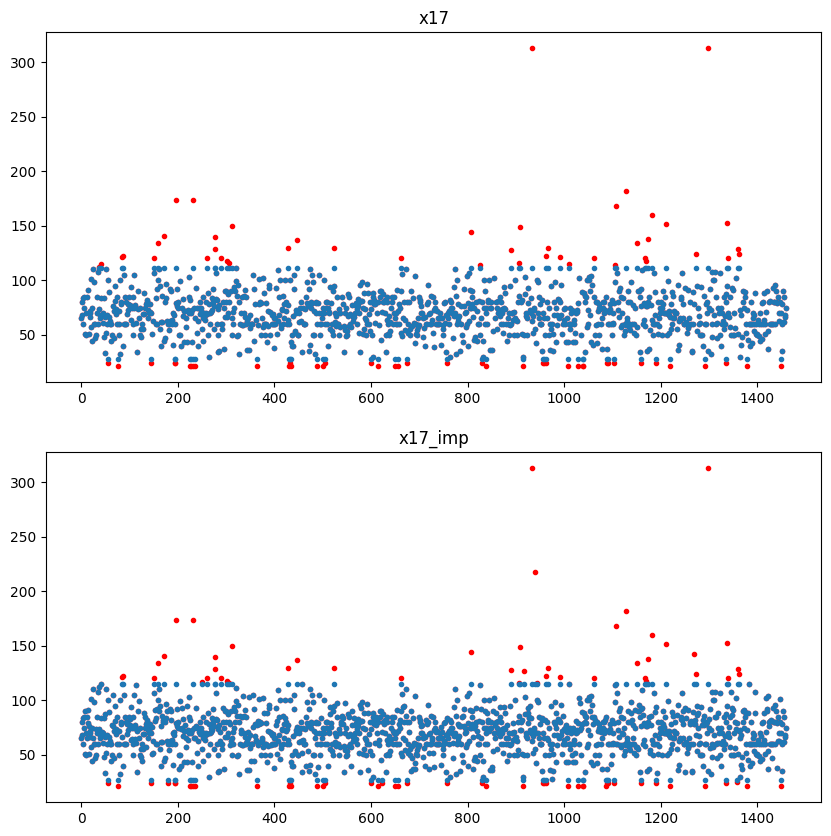

In [17]:
xs = [
    ("x17", X["x17"]),
    ("x17_imp", X["x17_imp"]),
]

fig, axis = pyplot.subplots(len(xs), 1, figsize=(10, 10))

for i, (nombre, x) in enumerate(xs):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    xmin = Q1 - 1.5 * IQR
    xmax = Q3 + 1.5 * IQR
    xp = x.copy().astype(float)
    xp[xp >= xmax] = xmax
    xp[xp <= xmin] = xmin
    axis[i].plot(x.index, x, marker=".", linestyle="", color="red")
    axis[i].plot(xp.index, xp, marker=".", linestyle="")
    axis[i].set_title(x.name)
    
    X.loc[:, [f"{nombre}_in"]] = xp 

X

Cuando quitamos los puntos atípicos, podemos observar cómo la distribución no está tan cargada.

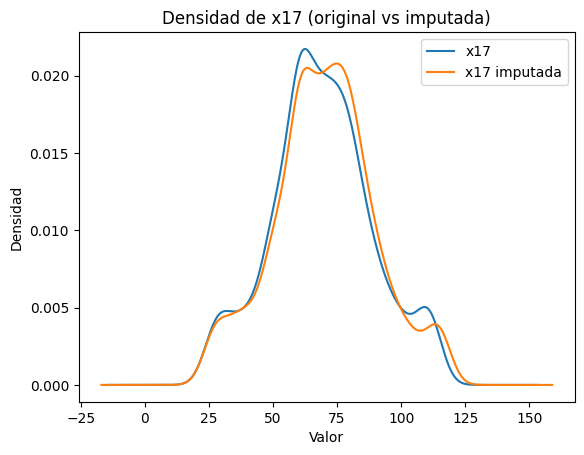

In [18]:
axis = X["x17_in"].plot.density(label="x17")
X["x17_imp_in"].plot.density(label="x17 imputada")

axis.set_title("Densidad de x17 (original vs imputada)")
axis.set_xlabel("Valor")
axis.set_ylabel("Densidad")
axis.legend()

También podemos ver el efecto de ajustar los valores atípicos con la gráfica de caja.

<Axes: >

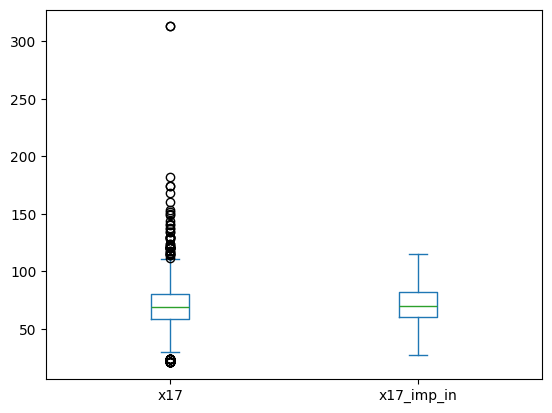

In [19]:
X[["x17", "x17_imp_in"]].plot.box()

# Fase 6 - Modelos de Regresión Ridge y Lasso

## Selección de variables finales

Construimos la matriz $X_2$ que seleccionará las variables finales de la matriz $X$ tomando en cuenta las variables que fueron transformadas e imputadas.

In [20]:
X2 = X.copy()

del X2["x2"]
del X2["x4"]
del X2["x9"]
del X2["x13"]
del X2["x17"]
del X2["x17_in"]
del X2["x17_imp"]

X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x1          1460 non-null   float64
 1   x3          1460 non-null   float64
 2   x5          1460 non-null   float64
 3   x6          1460 non-null   float64
 4   x7          1460 non-null   float64
 5   x8          1460 non-null   float64
 6   x10         1460 non-null   float64
 7   x11         1460 non-null   float64
 8   x12         1460 non-null   float64
 9   x14         1460 non-null   float64
 10  x15         1460 non-null   float64
 11  x16         1460 non-null   float64
 12  x18         1460 non-null   float64
 13  x19         1460 non-null   float64
 14  x20         1460 non-null   float64
 15  x21         1460 non-null   float64
 16  x22         1460 non-null   float64
 17  x2_in       1460 non-null   float64
 18  x4_in       1460 non-null   float64
 19  x9_in       1460 non-null  

La variable de respuesta será $SalePrice$ el precio de la casa

In [21]:
y = SalePrice

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


## Generación de conjuntos de entrenamiento y validación

Primero partiremos la matriz $X_2$ de las variables (predictivas) y el vector de respuesta, en proporción al $80\%$ para entrenamiento y $20\%$ restante para la validación (conjunto de prueba). Además usaremos una semilla aleatoria fija a $123$ para fines de reproducibilidad y aleatorizamos los datos para evitar entrenamiento ajustado al orden de los datos, lo que podría ser peligroso porque excluiría las últimas muestras del entrenamiento y las dejaría para las pruebas, pero si están ordenadas las pruebas no se parecerán en nada a los datos de entrenamiento.

In [22]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, train_size=0.8, shuffle=True, random_state=123)

X2_train.shape, X2_test.shape, y_train.shape, y_test.shape

((1168, 22), (292, 22), (1168,), (292,))

$\mathcal{L}$

## Ajuste de los dos modelos Ridge y Lasso

Como la respuesta $y$ o *SalePrice* es continua nos enfrentamos a un problema de **regresión**, por lo que usaremos la regresión lineal, pero con regularizaciones $L_2$ (Ridge) y $L_1$ (Lasso).

Considerando un hiperparámetro $\lambda = 1$ que será el factor de regularización.

La diferencia entre Ridge (regularización suave o cuadrática) y Lasso (regularización rígida o absoluta) es que los coeficientes de regresión encontrados serán más cercanos a cero en Lasso para las variables con poca influencia lineal en la respuesta.

Los modelos son adaptaciones al modelo de regresión lineal usando el factor de regularización $\lambda$.

**Midelo lineal** 

El modelo lineal base se expresa como:

$$
y=X \boldsymbol{\beta} + \varepsilon
$$

donde $y \in \mathbb{R}^n$ es el vector de respuesta, $X \in \mathbb{R}^{n \times (k+1)}$ es la matriz de diseño (incluyendo la columna de unos para el intercepto), $\beta \in \mathbb{R}^{k+1}$ es el vector de coeficientes, y $\varepsilon$ es el vector de errores aleatorios.

**Modelo Ridge**

La regresión Ridge busca estimar los coeficientes $\boldsymbol{\beta}$ minimizando la siguiente función de pérdida:
	$$\mathcal{L}_{\text{Ridge}}(\boldsymbol{\beta}) = (y - X\boldsymbol{\beta})^\top (y - X\boldsymbol{\beta}) + \lambda \|\boldsymbol{\beta}\|_2^2,$$
	donde $\|\boldsymbol{\beta}|_2^2 = \sum_{j=1}^{k} \beta_j^2$ es la norma cuadrada del vector de coeficientes (a menudo se excluye $ \beta_0 $ del término de penalización), y $ \lambda \geq 0$ es un hiperparámetro que controla la fuerza de la regularización.

O visto en el problema de minimización la función de pérdida $\mathcal{L}_{\text{Ridge}}(\boldsymbol{\beta})=SSE$ (en el caso de regresión) es la suma de los errores cuadráticos como:

$$
SSE = (y - \hat{y})^\top(y - \hat{y}) + \lambda \| \boldsymbol{\beta} \|_2^2
$$

donde $\hat{y} = X \boldsymbol{\beta}$

Tiene una solución análitica derivada de las ecuaciones normales:

$$
\hat{\boldsymbol{\beta}}_{Ridge} = (X^\top X + \lambda I)^{-1} X^\top y
$$

donde $I$ es la matriz identidad del tamaño adecuado (ajustada si no se penaliza $\beta_0$).

**Modelo Lasso**

La regresión Lasso también es una técnica de regularización, pero a diferencia de Ridge, puede llevar algunos coeficientes a ser exactamente cero, actuando así como una forma de selección automática de variables.
	
El modelo base también es:

$$ 
y = X\boldsymbol{\beta} + \varepsilon,
$$

y la función de pérdida que Lasso minimiza es:

$$ 
\mathcal{L}_{\text{Lasso}}(\boldsymbol{\beta}) = (y - X\boldsymbol{\beta})^\top (y - X\boldsymbol{\beta}) + \lambda \|\boldsymbol{\beta}\|_1,
$$

donde $\|\boldsymbol{\beta}\|_1 = \sum_{j=1}^{k} |\beta_j|$ es la norma $\ell_1$ del vector de coeficientes (usualmente también sin incluir $\beta_0$.

Este modelo no tiene solución analítica, por lo que requiere de un optimizador que busque los mejores coefientes $\boldsymbol{\beta}$.

In [23]:
from sklearn.linear_model import Ridge, Lasso

reg1 = Ridge(alpha=1)
reg2 = Lasso(alpha=1)

reg1.fit(X2_train, y_train)
reg2.fit(X2_train, y_train)

print(f"Ridge: {reg1.score(X2_test, y_test)}")
print(f"Lasso: {reg2.score(X2_test, y_test)}")

Ridge: 0.8167110562141526
Lasso: 0.8174124101554068


Observamos que ambos ajustes son similares con una puntuación o *score* en la validación cercanos al $81.7\%$.

## Inspección de los coeficientes de regresión

Podemos observar los valores en los coeficientes de regresión ($\boldsymbol{\beta}$) pero no podemos ver si uno es mejor que otro porque sus valores no están en las mismas dimensiones métricas o escala (los datos no están estandarizados).

### Coeficientes del modelo Ridge (no estandarizado)

In [24]:
pandas.DataFrame(reg1.coef_, index=X2.columns, columns=["Ridge Beta"])

,Ridge Beta
x1,0.002819
x3,-0.028060
x5,0.083839
x6,21194.716311
x7,70025.845585
x8,-17539.741894
x10,10654.416364
x11,34588.834679
x12,14561.704678
x14,-0.030879


### Coeficientes del modelo Lasso (no estandarizado)

In [25]:
pandas.DataFrame(reg2.coef_, index=X2.columns, columns=["Lasso Beta"])

,Lasso Beta
x1,0.002390
x3,-0.028062
x5,0.083868
x6,21673.104132
x7,71902.676432
x8,-19361.653624
x10,10751.075219
x11,35748.403057
x12,16735.983111
x14,-0.030615


## Ajuste con estandarización de los datos

También podemos estandarizar los datos (cada variable $x_j$) para ver si el modelo aumenta la predicción.

Estandarización de cada dato (se le resta su media y se divide entre su desviación estándar):

$$x_{i,s}=\frac{x_i-\bar{x}_i}{S_{x_i}}$$

Construimos la matriz $X_3$ a partir de la matriz de variables finales $X_2$ y estandarizamos cada variable.

In [26]:
n, m = X2.shape

X3 = numpy.zeros((n, m))

columns = [
    "x1", "x2_in", "x3", "x4_in", "x5", "x6", "x7", "x8", "x9_in", "x10",
    "x11", "x12", "x13_in", "x14", "x15", "x16", "x17_imp_in", "x18", "x19", "x20",
    "x21", "x22"
]

for j, column in enumerate(columns):
    xj = X2[column]
    X3[:, j] = (xj - xj.mean()) / xj.std()

X3 = pandas.DataFrame(X3, columns=[f"x{j + 1}" for j in range(len(columns))])

X3

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,-4.083534,-0.333130,0.237730,1.052885,-4.262961,1.410829,-0.192111,-0.098363,0.428489,-0.89550,...,0.373381,-3.282135,3.640193,-3.025581,-0.263009,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
1,-4.083534,-0.013184,0.237730,0.156125,-1.384055,-0.708318,-0.192111,-0.098363,-0.502177,-0.89550,...,-0.051523,-3.282135,3.640193,-3.025581,0.496336,-0.818548,-0.27107,-0.16561,-0.25622,-0.144792
2,-4.083534,0.445869,0.237730,0.986459,-1.384055,1.410829,-0.192111,-0.098363,0.586370,-0.89550,...,0.663088,-3.282135,3.640193,-3.025581,-0.111140,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
3,-4.083534,-0.027095,0.237730,-1.869888,-1.384055,-0.708318,-0.192111,-0.098363,0.443031,1.11593,...,0.827255,-3.282135,3.640193,-3.025581,-0.516124,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
4,-4.083534,1.283293,0.237730,0.953245,-1.384055,1.410829,-0.192111,-0.098363,1.442250,-0.89550,...,1.763975,-3.282135,3.640193,-3.025581,0.698828,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-2.095799,-0.481418,0.985904,0.920032,1.247144,-0.708318,-0.192111,-0.098363,0.297614,-0.89550,...,-0.051523,0.150550,0.575830,0.304180,-0.414878,-0.818548,-0.27107,-0.16561,-0.25622,-0.144792
1456,-2.095799,0.981431,0.985904,0.222552,1.247144,-0.708318,-0.192111,-0.098363,1.182578,-0.89550,...,0.141615,0.150550,0.575830,0.304180,0.749450,-0.818548,-0.27107,-0.16561,-0.25622,-0.144792
1457,-2.095799,-0.168427,0.985904,-1.006341,1.247144,-0.708318,5.201767,-0.098363,1.737238,-0.89550,...,-1.055841,0.150550,0.575830,0.304180,-0.212386,1.220838,-0.27107,-0.16561,-0.25622,-0.144792
1458,-2.095799,0.019367,0.985904,-0.707421,1.247144,-0.708318,-0.192111,-0.098363,-0.884415,1.11593,...,-1.113782,0.150550,0.575830,0.304180,-0.111140,1.220838,-0.27107,-0.16561,-0.25622,-0.144792


In [27]:
X3.shape, y.shape

((1460, 22), (1460,))

Repetimos la partición de los datos con la misma semilla aleatoria.

In [28]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, train_size=0.8, shuffle=True, random_state=123)

X3_train.shape, X3_test.shape, y_train.shape, y_test.shape

((1168, 22), (292, 22), (1168,), (292,))

## Ajuste de los dos modelos Ridge y Lasso (datos estandarizados)

Ajustamos nuevamente los modelos con los datos ya estandarizados.

In [29]:
from sklearn.linear_model import Ridge, Lasso

reg3 = Ridge(alpha=1)
reg4 = Lasso(alpha=10)

reg3.fit(X3_train, y_train)
reg4.fit(X3_train, y_train)

print(f"Ridge: {reg3.score(X3_test, y_test)}")
print(f"Lasso: {reg4.score(X3_test, y_test)}")

Ridge: 0.817461269788647
Lasso: 0.8174326616759202


Aunque el ajuste en la predicción mejora, no es bastante pero si aumenta en Ridge.

## Inspección de los coeficientes de regresión (datos estandarizados)

Al estandarizar los datos, si podemos comparar la influencia de las variables predictoras en la respuesta a través del valor en los coeficientes de regresión $\boldsymbol{\beta}$ encontrados.

Observamos que algunos tienen una alta influencia positiva y otros una alta influencia negativa.

Siendo la variable $x_8$ *ExternalQual - Fa* la de mayor influencia negativa, que es la *dummy* que dice si la calidad del material exterior es regular o no, con un efecto negativo, es decir, cuando el material exterior es regular, el precio de la casa baja proporcionalmente (en proporción inversa).

Y siendo la variable $x_9$ *GrLivArea* la de mayor influencia positiva, que es el tamaño de área habitable de la casa, que dice que entre mayor sea esta área, mayor será el precio de la casa (en proporción directa).

Por otro lado la variable $x_{15}$ *BsmtCond* tiene una influencia muy baja o casi cero, que es si la casa tiene sótano, en este caso no hay una correlación lineal fuerte entre esta variable y el precio de la casa (se puede deber a que es de varianza casi cero).

### Coeficientes del modelo Ridge (estandarizado)

In [30]:
pandas.DataFrame(reg3.coef_, index=X3.columns, columns=["Ridge Beta"]).sort_values(by="Ridge Beta")

,Ridge Beta
x8,-1902.075583
x3,-1645.807680
x16,-743.597691
x14,-549.536596
x22,-527.865953
x21,-315.876449
x15,21.615356
x1,62.704432
x17,338.617573
x20,616.311142


### Coeficientes del modelo Lasso (estandarizado)

In [31]:
pandas.DataFrame(reg4.coef_, index=X3.columns, columns=["Lasso Beta"]).sort_values(by="Lasso Beta")

,Lasso Beta
x8,-1887.475864
x3,-1641.996205
x16,-737.013095
x14,-543.903597
x22,-517.076496
x21,-301.347986
x15,9.338803
x1,55.290450
x17,315.816742
x20,600.478091


## Probando otro modelo de regresión

Finalmente probaremos un modelo de regresión por bosques aleatorios para determinar si la predicción aumenta.

In [32]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X3_train, y_train)

print(f"Bosque aleatorio: {reg.score(X3_test, y_test)}")

Bosque aleatorio: 0.8476231067669169


Observamos que la predicción mejora con un algoritmo no lineal, pero tampoco es bastante mayor el porcentaje.